# Fixed Points and Stability

## Initial setup

In [1]:
set_plot_option([svg_file, "maxplot.svg"])$

## $f(x) = x^2$

Let's define and plot a function:

In [2]:
f(x) := x^2;

                                           2
(%o3)                             f(x) := x

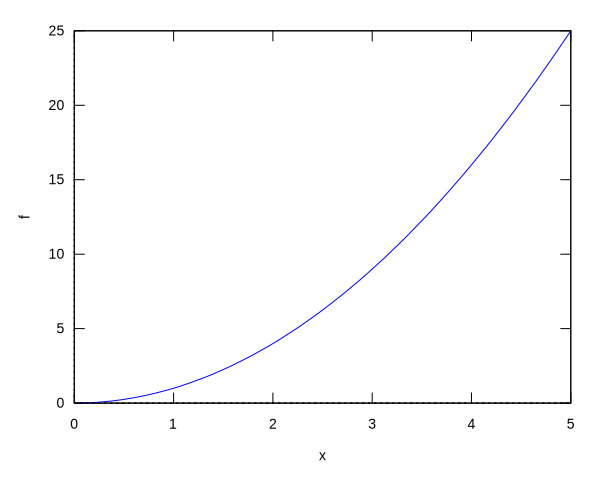

In [3]:
plot2d (f, [x, 0, 5])$

Can we solve iterated functions using basic tools in the FP toolbox?

In [4]:
map (f, [1,2,3,4,5,6]);

(%o5)                        [1, 4, 9, 16, 25, 36]

In [5]:
f_recurse(acc, x) := append(acc, [f(x)])$

In [6]:
lreduce (f_recurse, [[],1,2,3,4,5,6]);

(%o7)                        [1, 4, 9, 16, 25, 36]

Doesn't look like it. 

We're going to need to define a recursive function that does what we're looking for. In particular, we need a function that does the following:

* when called, computes a particular function and then uses that result to call itself (again)
* builds up and finally returns a data strcuture that is a list of points
* each point in the result should have a first value of `t` and a second value of the result at time `t`
* in order to support this, we're going to need to pass as arguments to our function:
  * an accumulator
  * an initial (or computed) value, `x`
  * the current iteration, `n`

In [7]:
f_rec(func, acc, x, n) := 
    block ([t: length(acc)],
        (if t = n
         then acc
         else f_rec(func, endcons([t, func(x)], acc), func(x), n)))$
         
recurse(func, x, n) :=
    f_rec(func, [[0, x]], x, n)$

Note that the `endcons` function is similar to Clojure's `conj` in that it adds a new value to our list of results, the accumulator `acc`.

Now let's generate some data sets with our new function:

In [8]:
xy0: recurse(f, 0, 5);
xy1: recurse(f, 0.5, 5);
xy2: recurse(f, 0.8, 5);
xy3: recurse(f, 0.9, 5);
xy4: recurse(f, 1, 5);
xy5: recurse(f, 1.1, 5);
xy6: recurse(f, 1.2, 5);
xy7: recurse(f, 1.5, 5);

(%o10)             [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0]]

(%o11) [[0, 0.5], [1, 0.25], [2, 0.0625], [3, 0.00390625], 
                                                         [4, 1.52587890625e-5]]

(%o12) [[0, 0.8], [1, 0.6400000000000001], [2, 0.4096000000000002], 
                             [3, 0.1677721600000001], [4, 0.02814749767106565]]

(%o13) [[0, 0.9], [1, 0.81], [2, 0.6561000000000001], [3, 0.4304672100000002], 
                                                       [4, 0.1853020188851842]]

(%o14)             [[0, 1], [1, 1], [2, 1], [3, 1], [4, 1]]

(%o15) [[0, 1.1], [1, 1.21], [2, 1.4641], [3, 2.143588810000001], 
                                                        [4, 4.594972986357221]]

(%o16) [[0, 1.2], [1, 1.44], [2, 2.0736], [3, 4.299816959999999], 
                                                        [4, 18.48842588950363]]

(%o17) [[0, 1.5], [1, 2.25], [2, 5.0625], [3, 25.62890625], 
                                                        [4, 656.8408355712891]]

Let's plot what we have:

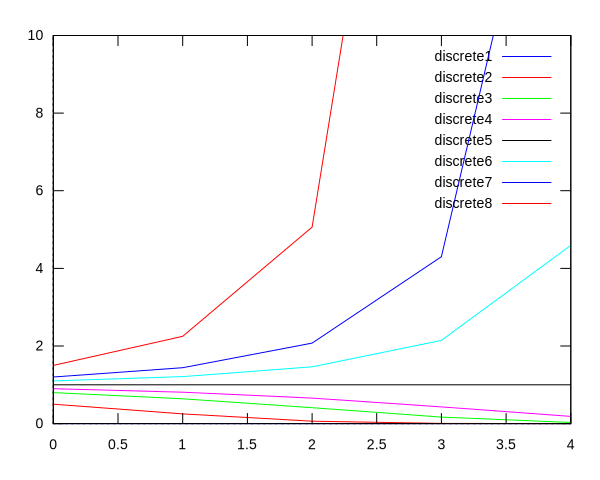

In [9]:
plot2d([[discrete,xy0],
        [discrete,xy1],
        [discrete,xy2],
        [discrete,xy3],
        [discrete,xy4],
        [discrete,xy5],
        [discrete,xy6],
        [discrete,xy7]], [x, 0, 4], [y, 0, 10])$

The function above was written in Maxima, but we have an alternative and much more powerful option: since Maxima is written in Common Lisp, we have access to that language as well. Let's rewrite this in Lisp:

In [31]:
to_lisp()$

(defun points->maxima (data)
  (cons '(mlist) 
        (map 'list (lambda (x) `((mlist) ,@x)) data)))

(defun $recurse (func x0 n)
  (labels ((r0 (acc)
    (let ((step (length acc)))
      (if (eql step n) 
        (points->maxima acc)
        (let* ((args (cdar (last acc)))
               (xn (apply func args)))
          (r0 (append acc `((,step ,xn)))))))))
   (r0 `((0 ,x0)))))
  
(defun $squared (x)
  (* x x))
  
(to-maxima)

POINTS->MAXIMA

$RECURSE

$SQUARED


Type (to-maxima) to restart, ($quit) to quit Maxima.

REDEFINITION-WITH-DEFUN: 
  redefining MAXIMA::POINTS->MAXIMA in DEFUN

REDEFINITION-WITH-DEFUN: 
  redefining MAXIMA::$RECURSE in DEFUN

REDEFINITION-WITH-DEFUN: 
  redefining MAXIMA::$SQUARED in DEFUN
Returning to Maxima


For more information on these Lisp functions (and how we came up with them), be sure to see the [Use of Lisp](https://nbviewer.jupyter.org/github/calyau/maxima-tutorial-notebooks/blob/master/notebooks/Use%20of%20Lisp.ipynb) Maxima notebook (in particular, the subsection "Programming in Lisp").

Now let's generate some iterated solutions for our function:

In [32]:
xy0: recurse(squared, 0, 5);
xy1: recurse(squared, 0.5, 5);
xy2: recurse(squared, 0.8, 5);
xy3: recurse(squared, 0.9, 5);
xy4: recurse(squared, 1, 5);
xy5: recurse(squared, 1.1, 5);
xy6: recurse(squared, 1.2, 5);
xy7: recurse(squared, 1.5, 5);

(%o83)             [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0]]

(%o84) [[0, 0.5], [1, 0.25], [2, 0.0625], [3, 0.00390625], 
                                                         [4, 1.52587890625e-5]]

(%o85) [[0, 0.8], [1, 0.6400000000000001], [2, 0.4096000000000002], 
                             [3, 0.1677721600000001], [4, 0.02814749767106565]]

(%o86) [[0, 0.9], [1, 0.81], [2, 0.6561000000000001], [3, 0.4304672100000002], 
                                                       [4, 0.1853020188851842]]

(%o87)             [[0, 1], [1, 1], [2, 1], [3, 1], [4, 1]]

(%o88) [[0, 1.1], [1, 1.21], [2, 1.4641], [3, 2.143588810000001], 
                                                        [4, 4.594972986357221]]

(%o89) [[0, 1.2], [1, 1.44], [2, 2.0736], [3, 4.299816959999999], 
                                                        [4, 18.48842588950363]]

(%o90) [[0, 1.5], [1, 2.25], [2, 5.0625], [3, 25.62890625], 
                                                        [4, 656.8408355712891]]

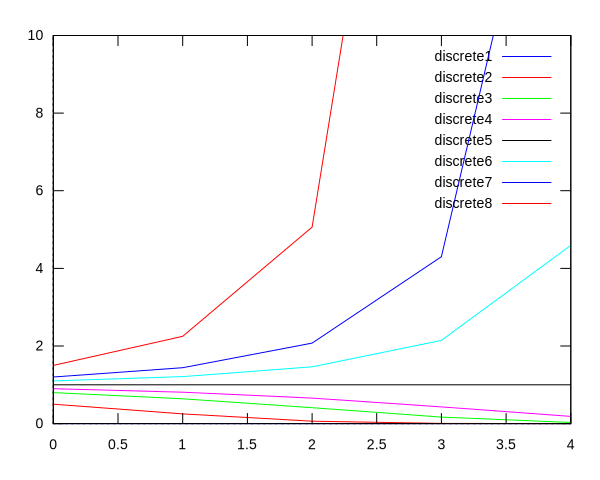

In [33]:
set_plot_option([svg_file, "maxplot.svg"])$
plot2d([[discrete,xy0],
        [discrete,xy1],
        [discrete,xy2],
        [discrete,xy3],
        [discrete,xy4],
        [discrete,xy5],
        [discrete,xy6],
        [discrete,xy7]], [x, 0, 4], [y, 0, 10])$

## $h(x) = 3x - 10$

In [13]:
h(x) := 3 * x - 10;

(%o30)                         h(x) := 3 x - 10

In [14]:
xy1: recurse(h, -5, 5);
xy2: recurse(h, 0, 5);
xy3: recurse(h, 3.33, 5);
xy4: recurse(h, 5, 5);


(%o31)     [[0, - 5], [1, - 25], [2, - 85], [3, - 265], [4, - 805]]

(%o32)      [[0, 0], [1, - 10], [2, - 40], [3, - 130], [4, - 400]]

(%o33) [[0, 3.33], [1, - 0.009999999999999787], [2, - 10.03], [3, - 40.09], 
                                                                 [4, - 130.27]]

(%o34)             [[0, 5], [1, 5], [2, 5], [3, 5], [4, 5]]

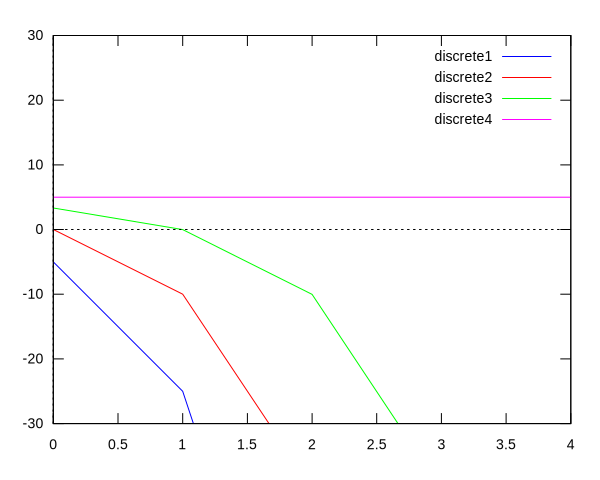

In [15]:
plot2d([[discrete,xy1],
        [discrete,xy2],
        [discrete,xy3],
        [discrete,xy4]], [x, 0, 4], [y, -30, 30])$

## $f(x) = \frac {1} {4} x + 12$

In [16]:
f(x) := 1/4 * x + 12;

                                       1
(%o36)                        f(x) := (-) x + 12
                                       4

In [17]:
xy1: recurse(f, -48, 5);
xy2: recurse(f, -36, 5);
xy3: recurse(f, -24, 5);
xy4: recurse(f, -12, 5);
xy5: recurse(f, 0, 5);
xy6: recurse(f, 12, 5);
xy7: recurse(f, 24, 5);
xy8: recurse(f, 36, 5);
xy9: recurse(f, 48, 5);

                                                          63
(%o37)          [[0, - 48], [1, 0], [2, 12], [3, 15], [4, --]]
                                                          4

                                       51       243       1011
(%o38)         [[0, - 36], [1, 3], [2, --], [3, ---], [4, ----]]
                                       4        16         64

                                       27       123       507
(%o39)         [[0, - 24], [1, 6], [2, --], [3, ---], [4, ---]]
                                       2         8        32

                                       57       249       1017
(%o40)         [[0, - 12], [1, 9], [2, --], [3, ---], [4, ----]]
                                       4        16         64

                                                63       255
(%o41)           [[0, 0], [1, 12], [2, 15], [3, --], [4, ---]]
                                                4        16

                                      63       255       1023
(%o42)         [[0, 12], [1, 15], [2, --], [3, ---], [4, ----]]
                                      4        16         64

                                       33       129       513
(%o43)          [[0, 24], [1, 18], [2, --], [3, ---], [4, ---]]
                                       2         8        32

                                      69       261       1029
(%o44)         [[0, 36], [1, 21], [2, --], [3, ---], [4, ----]]
                                      4        16         64

                                                33       129
(%o45)          [[0, 48], [1, 24], [2, 18], [3, --], [4, ---]]
                                                2         8

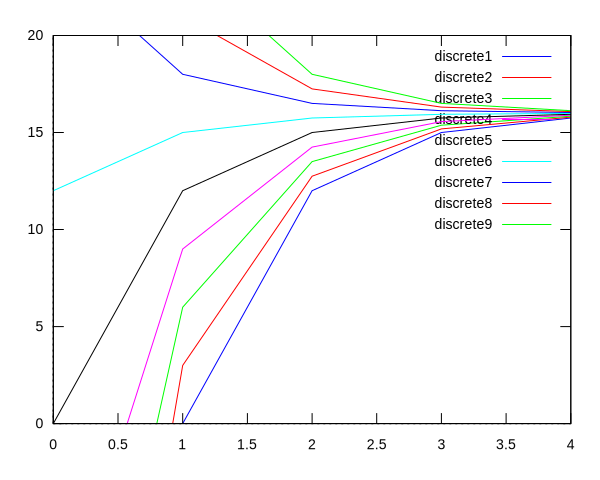

In [18]:
plot2d([[discrete,xy1],
        [discrete,xy2],
        [discrete,xy3],
        [discrete,xy4],
        [discrete,xy5],
        [discrete,xy6],
        [discrete,xy7],
        [discrete,xy8],
        [discrete,xy9]], [x, 0, 4], [y, 0, 20])$

## $f(x) = \frac {1} {2} x + 4$

In [19]:
f(x) := 1/2 * x + 4;

                                        1
(%o47)                         f(x) := (-) x + 4
                                        2

In [20]:
xy1: recurse(f, 4, 3);

(%o48)                     [[0, 4], [1, 6], [2, 7]]

## $g(x) = \frac {1} {2} x + 3$

In [21]:
g(x) := 1/2 * x + 3;

                                        1
(%o49)                         g(x) := (-) x + 3
                                        2

In [22]:
xy1: recurse(g, 0, 6);
xy2: recurse(g, 1, 6);
xy3: recurse(g, 2, 6);
xy4: recurse(g, 4, 6);
xy5: recurse(g, 6, 6);
xy6: recurse(g, 8, 6);
xy6: recurse(g, 10, 6);
xy7: recurse(g, 11, 6);

                                   9       21       45       93
(%o50)        [[0, 0], [1, 3], [2, -], [3, --], [4, --], [5, --]]
                                   2       4        8        16

                          7       19       43       91       187
(%o51)       [[0, 1], [1, -], [2, --], [3, --], [4, --], [5, ---]]
                          2       4        8        16       32

                                           11       23       47
(%o52)        [[0, 2], [1, 4], [2, 5], [3, --], [4, --], [5, --]]
                                           2        4        8

                                  11       23       47       95
(%o53)       [[0, 4], [1, 5], [2, --], [3, --], [4, --], [5, --]]
                                  2        4        8        16

(%o54)         [[0, 6], [1, 6], [2, 6], [3, 6], [4, 6], [5, 6]]

                                  13       25       49       97
(%o55)       [[0, 8], [1, 7], [2, --], [3, --], [4, --], [5, --]]
                                  2        4        8        16

                                           13       25       49
(%o56)       [[0, 10], [1, 8], [2, 7], [3, --], [4, --], [5, --]]
                                           2        4        8

                         17       29       53       101       197
(%o57)     [[0, 11], [1, --], [2, --], [3, --], [4, ---], [5, ---]]
                         2        4        8        16        32

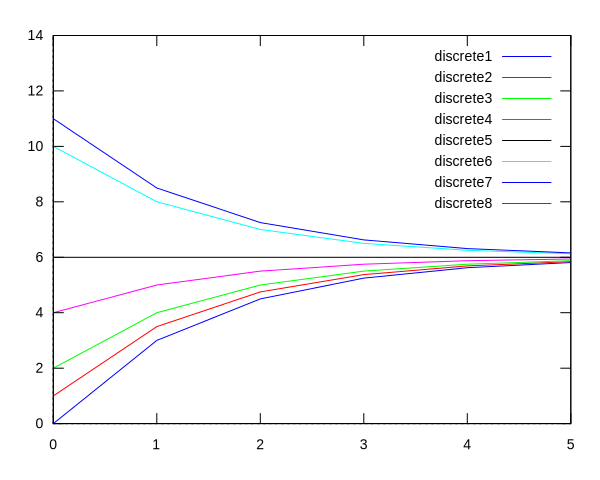

In [23]:
plot2d([[discrete,xy1],
        [discrete,xy2],
        [discrete,xy3],
        [discrete,xy4],
        [discrete,xy5],
        [discrete,xy6],
        [discrete,xy7],
        [discrete,xy8]], [x, 0, 5], [y, 0, 14])$

## $h(x) = 2x$

In [24]:
h(x) := 2 * x;

(%o59)                            h(x) := 2 x

In [25]:
xy1: recurse(h, 1, 4);
xy2: recurse(h, 2, 4);

(%o60)                 [[0, 1], [1, 2], [2, 4], [3, 8]]

(%o61)                 [[0, 2], [1, 4], [2, 8], [3, 16]]